# Genetic Disorder Prediction

<details>
<summary><h3>Context</h3></summary>
<p>
Since the dawn of human life on the face of the earth, the global population has been booming. The population was estimated to be 1 billion people in the year 1800. The figure had increased to a new high of 6 billion humans by the turn of the twentieth century. Day in and day out, 227,000 people are being added to the world; it is projected that by the end of the 21st century, the world's population may exceed 11 billion.
</p>
<p>
As per reports, as a consequence of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. Often kids die as a result of these illnesses, thus genetic testing during pregnancy is critical.
</p>
</details>

<details>
<summary><h3>Problem Statement</h3></summary>
<p>
You are hired as a Machine Learning Engineer from a government agency. You are given a dataset that contains medical information about children who have genetic disorders. Your task is to predict the following:
</p>
<ul>
    <li>Genetic disorder</li>
    <li>Disorder subclass</li>
</ul>
</details>


<details>
<summary><h4>Dataset</h4></summary>
<p>
Dataset downloaded from <a href="https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge">Kaggle - Data of Genomes and Genetics</a>
</p>
</details>


## Table of Contents
1. [Import Libraries](#import_libraries)
2. [Load Data](#load_data)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing](#data_preprocessing)
5. [Model Building](#model_building)
6. [Model Evaluation](#model_evaluation)
7. [Model Saving](#model_saving)

## 1. Import Libraries <a id="import_libraries">¶</a>

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8-darkgrid")

from scipy.stats import chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## 2. Load Data <a id="load_data">¶</a>

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,patient_age,gender,birth_defects,blood_cell_count_(mcl),white_blood_cell_count_(thousand_per_microliter),blood_test_result,respiratory_rate_(breaths/min),heart_rate_(rates/min),folic_acid_details_(peri-conceptional),h/o_serious_maternal_illness,h/o_substance_abuse,h/o_radiation_exposure_(x-ray),birth_asphyxia,genes_in_mother_side,inherited_from_father,maternal_gene,paternal_gene,mother_age,father_age,assisted_conception_ivf/art,history_of_anomalies_in_previous_pregnancies,no_of_previous_abortion,genetic_disorder,disorder_subclass
0,2.0,NaN,NaN,4.760603,9.857562,NaN,Normal (30-60),Normal,No,NaN,No,No,NaN,Yes,No,Yes,No,NaN,NaN,No,Yes,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,6.0,NaN,Singular,4.893297,NaN,normal,Normal (30-60),Tachycardia,Yes,No,NaN,Yes,No record,Yes,No,No,No,41.0,22.0,Yes,Yes,4.0,Multifactorial genetic inheritance disorders,Diabetes
2,12.0,Male,Singular,4.705280,7.919321,inconclusive,Tachypnea,Normal,No,Yes,Not applicable,-,Not available,Yes,No,Yes,No,21.0,NaN,NaN,Yes,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,11.0,Male,Multiple,4.720703,4.098210,NaN,Tachypnea,Tachycardia,No,Yes,Not applicable,-,Not available,Yes,No,NaN,Yes,32.0,NaN,Yes,No,4.0,Multifactorial genetic inheritance disorders,Cancer
4,14.0,Female,Multiple,5.103188,10.272230,normal,NaN,Normal,No,No,No,No,Not available,Yes,No,Yes,No,NaN,NaN,NaN,No,0.0,Single-gene inheritance diseases,Cystic fibrosis


## 3. Exploratory Data Analysis <a id="eda">¶</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18047 entries, 0 to 18046
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   patient_age                                       16987 non-null  float64
 1   gender                                            16474 non-null  object 
 2   birth_defects                                     16482 non-null  object 
 3   blood_cell_count_(mcl)                            18047 non-null  float64
 4   white_blood_cell_count_(thousand_per_microliter)  16440 non-null  float64
 5   blood_test_result                                 16483 non-null  object 
 6   respiratory_rate_(breaths/min)                    16477 non-null  object 
 7   heart_rate_(rates/min)                            16519 non-null  object 
 8   folic_acid_details_(peri-conceptional)            16483 non-null  object 
 9   h/o_serious_mater

In [5]:
df.isna().sum()

patient_age                                         1060
gender                                              1573
birth_defects                                       1565
blood_cell_count_(mcl)                                 0
white_blood_cell_count_(thousand_per_microliter)    1607
blood_test_result                                   1564
respiratory_rate_(breaths/min)                      1570
heart_rate_(rates/min)                              1528
folic_acid_details_(peri-conceptional)              1564
h/o_serious_maternal_illness                        1552
h/o_substance_abuse                                 1632
h/o_radiation_exposure_(x-ray)                      1584
birth_asphyxia                                      1552
genes_in_mother_side                                   0
inherited_from_father                                220
maternal_gene                                       2071
paternal_gene                                          0
mother_age                     

In [6]:
df.groupby("genetic_disorder")["disorder_subclass"].value_counts()

genetic_disorder                              disorder_subclass                  
Mitochondrial genetic inheritance disorders   Leigh syndrome                         4683
                                              Mitochondrial myopathy                 3971
                                              Leber's hereditary optic neuropathy     587
Multifactorial genetic inheritance disorders  Diabetes                               1653
                                              Alzheimer's                             133
                                              Cancer                                   91
Single-gene inheritance diseases              Cystic fibrosis                        3145
                                              Tay-Sachs                              2556
                                              Hemochromatosis                        1228
Name: count, dtype: int64

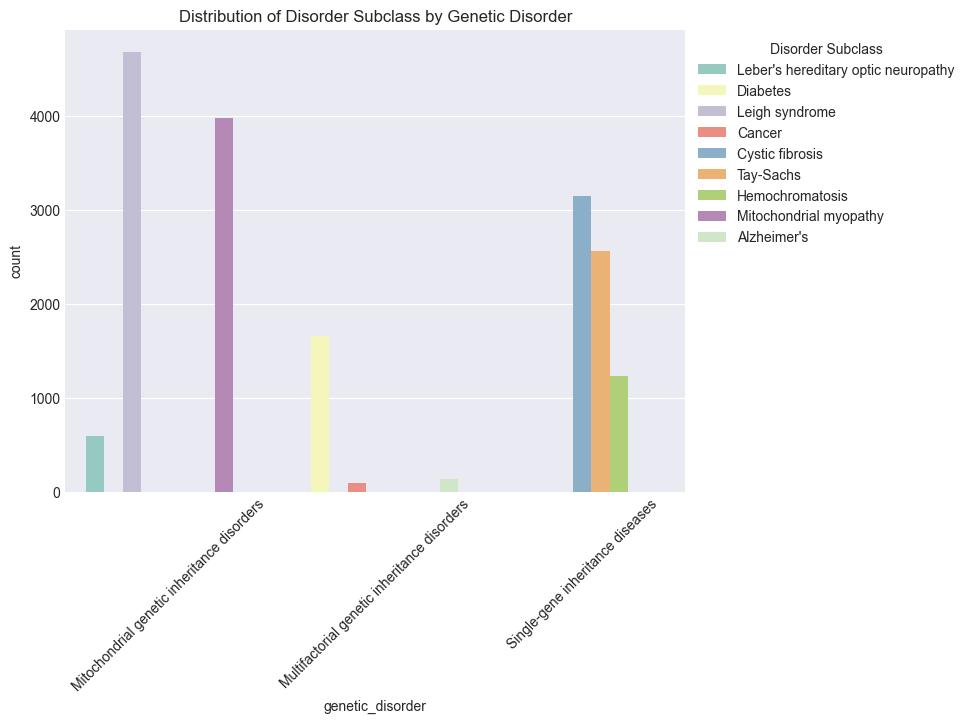

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='genetic_disorder', hue='disorder_subclass')
plt.xticks(rotation=45)
plt.title('Distribution of Disorder Subclass by Genetic Disorder')
plt.legend(title='Disorder Subclass', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
contingency_table = pd.crosstab(
    df['genetic_disorder'], df['disorder_subclass'])
contingency_table

disorder_subclass,Alzheimer's,Cancer,Cystic fibrosis,Diabetes,Hemochromatosis,Leber's hereditary optic neuropathy,Leigh syndrome,Mitochondrial myopathy,Tay-Sachs
genetic_disorder,,,,,,,,,
Mitochondrial genetic inheritance disorders,0,0,0,0,0,587,4683,3971,0
Multifactorial genetic inheritance disorders,133,91,0,1653,0,0,0,0,0
Single-gene inheritance diseases,0,0,3145,0,1228,0,0,0,2556


In [11]:
# Perform Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between genetic_disorder and disorder_subclass.")
else:
    print("There is no significant association between genetic_disorder and disorder_subclass.")

Chi-Square Statistic: 36094.0
P-Value: 0.0
There is a significant association between genetic_disorder and disorder_subclass.


## 4. Data Preprocessing <a id="data_preprocessing">¶</a>

In [12]:
X = df.drop(columns=["genetic_disorder", "disorder_subclass"])
y = df[["genetic_disorder", "disorder_subclass"]]\
    .copy(deep=True)\
    .apply(lambda x: '-'.join(list(x)), axis=1)

In [13]:
X.head()

,patient_age,gender,birth_defects,blood_cell_count_(mcl),white_blood_cell_count_(thousand_per_microliter),blood_test_result,respiratory_rate_(breaths/min),heart_rate_(rates/min),folic_acid_details_(peri-conceptional),h/o_serious_maternal_illness,h/o_substance_abuse,h/o_radiation_exposure_(x-ray),birth_asphyxia,genes_in_mother_side,inherited_from_father,maternal_gene,paternal_gene,mother_age,father_age,assisted_conception_ivf/art,history_of_anomalies_in_previous_pregnancies,no_of_previous_abortion
0,2.0,NaN,NaN,4.760603,9.857562,NaN,Normal (30-60),Normal,No,NaN,No,No,NaN,Yes,No,Yes,No,NaN,NaN,No,Yes,NaN
1,6.0,NaN,Singular,4.893297,NaN,normal,Normal (30-60),Tachycardia,Yes,No,NaN,Yes,No record,Yes,No,No,No,41.0,22.0,Yes,Yes,4.0
2,12.0,Male,Singular,4.705280,7.919321,inconclusive,Tachypnea,Normal,No,Yes,Not applicable,-,Not available,Yes,No,Yes,No,21.0,NaN,NaN,Yes,1.0
3,11.0,Male,Multiple,4.720703,4.098210,NaN,Tachypnea,Tachycardia,No,Yes,Not applicable,-,Not available,Yes,No,NaN,Yes,32.0,NaN,Yes,No,4.0
4,14.0,Female,Multiple,5.103188,10.272230,normal,NaN,Normal,No,No,No,No,Not available,Yes,No,Yes,No,NaN,NaN,NaN,No,0.0


In [14]:
y.head()

0    Mitochondrial genetic inheritance disorders-Le...
1    Multifactorial genetic inheritance disorders-D...
2    Mitochondrial genetic inheritance disorders-Le...
3    Multifactorial genetic inheritance disorders-C...
4     Single-gene inheritance diseases-Cystic fibrosis
dtype: object

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape

((14437, 22), (3610, 22))

In [16]:
# Select numerical and categorical columns
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Target encoding
y_encoder = OrdinalEncoder()

# Preprocessing for numerical data
num_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=400, max_depth=4, random_state=42))
])

In [17]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['patient_age', 'blood_cell_count_(mcl)',
       'white_blood_cell_count_(thousand_per_microliter)', 'mother_age',
       'father_age', 'no_of_previous_abortion'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc...
       'h/o_serious_maternal_illness', 'h/o_substance_abuse',
       'h/o_radiation_exposure_(x-ray)', 'birth_asphyxia',
       'genes_in_mother_side', 'inherited_from_father', 'maternal_gene',
       'paternal_gene', 'assisted_conception_ivf/art',
       'history_of_anomalies_in_previous_pregnancies'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=4, n_estimators=400,
                                        random_state=42))])

In [18]:
y_train_encoded = y_encoder.fit_transform(pd.DataFrame(y_train)).flatten()
y_train_encoded[:5]

array([1., 8., 6., 8., 1.])

## 5. Model Building <a id="model_building">¶</a>

In [19]:
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['patient_age', 'blood_cell_count_(mcl)',
       'white_blood_cell_count_(thousand_per_microliter)', 'mother_age',
       'father_age', 'no_of_previous_abortion'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc...
       'h/o_serious_maternal_illness', 'h/o_substance_abuse',
       'h/o_radiation_exposure_(x-ray)', 'birth_asphyxia',
       'genes_in_mother_side', 'inherited_from_father', 'maternal_gene',
       'paternal_gene', 'assisted_conception_ivf/art',
       'history_of_anomalies_in_previous_pregnancies'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=4, n_estimators=400,
                                        random_state=42))])

## 6. Model Evaluation <a id="model_evaluation">¶</a>

In [22]:
y_valid_encoded = y_encoder.transform(pd.DataFrame(y_valid)).flatten()
y_valid_encoded[:5]

array([8., 2., 2., 2., 6.])

In [23]:
pipeline.predict(X_valid)[:5]

array([1., 1., 2., 1., 1.])

In [24]:
accuracy_score(y_valid_encoded, pipeline.predict(X_valid))

0.26371191135734073

## 7. Model Saving <a id="model_saving">¶</a>

In [62]:
joblib.dump(pipeline, "../ml/pipeline_model.pkl")
joblib.dump(y_encoder, "../ml/y_encoder.pkl")
joblib.dump(X.columns, "../ml/columns.pkl")

['../ml/columns.pkl']

In [26]:
loaded_pipeline = joblib.load("../ml/pipeline_model.pkl")
loaded_y_encoder = joblib.load("../ml/y_encoder.pkl")
loaded_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['patient_age', 'blood_cell_count_(mcl)',
       'white_blood_cell_count_(thousand_per_microliter)', 'mother_age',
       'father_age', 'no_of_previous_abortion'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc...
       'h/o_serious_maternal_illness', 'h/o_substance_abuse',
       'h/o_radiation_exposure_(x-ray)', 'birth_asphyxia',
       'genes_in_mother_side', 'inherited_from_father', 'maternal_gene',
       'paternal_gene', 'assisted_conception_ivf/art',
       'history_of_anomalies_in_previous_pregnancies'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=4, n_estimators=400,
                                        random_state=42))])

In [27]:
loaded_pipeline.predict(X_valid)[:5]

array([1., 1., 2., 1., 1.])

In [28]:
y_valid_encoded = loaded_y_encoder.transform(pd.DataFrame(y_valid)).flatten()
y_valid_encoded[:5]

array([8., 2., 2., 2., 6.])

In [30]:
accuracy_score(y_valid_encoded, loaded_pipeline.predict(X_valid))

0.26371191135734073

In [44]:
(
    loaded_y_encoder.inverse_transform(
        y_valid_encoded.reshape(-1, 1)).flatten() == y_valid.to_numpy()
).mean()

np.float64(1.0)